In [1]:
from matplotlib.pyplot import figure
import networkx as nx
from matplotlib.pyplot import figure
import pandas as pd
import matplotlib.pyplot as plt
from csv import reader
import sys  

In [2]:
df = pd.read_csv(r'/Users/hernanadasme/Projects/data_challenges/exports_29_11/rectype-63.csv')

In [3]:
df.rename({'Source': 'source'}, axis = 1, inplace=True)
df.rename({'Source year': 'source_year'}, axis = 1, inplace=True)
df.rename({'Boxers challenging RecordTitle': 'boxer_challenging'}, axis = 1, inplace=True)
df.rename({'Boxer Challenged RecordTitle': 'boxer_challenged'}, axis = 1, inplace=True)
df.rename({'Location Description': 'location_descp'}, axis = 1, inplace=True)
df.rename({'Status': 'status'}, axis = 1, inplace=True)
df.rename({'Conditions': 'condition'}, axis = 1, inplace=True)
df.rename({'City':'city'}, axis = 1, inplace=True)
df.rename({'Location':'location'}, axis = 1, inplace=True)
df.rename({'Challenge H-ID': 'challenge_id'}, axis = 1, inplace=True)
df.rename({'Boxers challenging H-ID': 'challenging_id'}, axis = 1, inplace=True)
df.rename({'Boxer Challenged H-ID': 'challenged_id'}, axis = 1, inplace=True)

In [6]:
df.head(1)

,challenge_id,rec_Title,source,source_year,challenging_id,boxer_challenging,challenged_id,boxer_challenged,status,condition,Basis,location_descp,city,location
0,969,Castillo\nBaeza,Semanario La Prensa. Los Andes,1928-03-02,865,"Castillo, Ernesto",836,"Baeza, Florencio",NaN,NaN,NaN,NaN,NaN,POINT(-70.597218 -32.833799)


In [8]:
df.head(37)

,challenge_id,rec_Title,source,source_year,challenging_id,boxer_challenging,challenged_id,boxer_challenged,status,condition,Basis,location_descp,city,location
0,969,Castillo\nBaeza,Semanario La Prensa. Los Andes,1928-03-02,865,"Castillo, Ernesto",836,"Baeza, Florencio",NaN,NaN,NaN,NaN,NaN,POINT(-70.597218 -32.833799)
1,972,Araya\nBolli,Semanario La Prensa. Los Andes,1928-04-05,882,"Araya, Manuel",780,"Bolli, Carlos",NaN,NaN,NaN,"Manager's business, downtown Los Andes.",NaN,POINT(-70.600875 -32.835752)
2,975,Valdes\nPérez,Semanario La Prensa. Los Andes,1928-04-08,833,"Valdes, Mario",272,"Pérez, Amador",NaN,NaN,NaN,NaN,NaN,POINT(-70.688871 -32.833203)
3,978,Ortiz\nAraya,Semanario La Prensa. Los Andes,1928-04-08,976,"Ortiz, Rafael",882,"Araya, Manuel",NaN,NaN,NaN,NaN,NaN,POINT(-70.598582 -32.833016)
4,985,Valdes\nGallardo,Semanario La Prensa. Los Andes,1928-04-29,833,"Valdes, Mario",827,"Gallardo, Pedro",NaN,NaN,NaN,NaN,NaN,POINT(-70.593621 -32.834478)
5,986,Silva\nIñiguez,Los Sports,1924-02-01,189,"Silva, Carlos",987,"Iñiguez, Mario",accepted,NaN,NaN,NaN,NaN,POINT(-70.397502 -23.650928)
6,988,Flores\nFarrafino,Los Sports,1924-03-07,302,"Flores, Sara",303,"Farrafino, Clementina",NaN,NaN,NaN,NaN,NaN,POINT(-70.397502 -23.650928)
7,993,Huerta\nGiaverini,Los Sports,1924-02-01,891,"Huerta, Francisco",573,"Giaverini, Oscar",NaN,NaN,NaN,NaN,NaN,POINT(-70.397502 -23.650928)
8,994,Huerta\nGiaverini,Los Sports,1924-02-01,891,"Huerta, Francisco",573,"Giaverini, Oscar",NaN,NaN,NaN,NaN,NaN,POINT(-70.397502 -23.650928)
9,1000,Tapia\nInostroza,Los Sports,1924-03-07,158,"Tapia, Julio",1001,"Inostroza, Ruperto",NaN,NaN,NaN,NaN,NaN,POINT(-70.397502 -23.650928)


In [10]:
box_csv = "/Users/hernanadasme/Documents/projects /data_challenges/data_box/ch_short.csv"

boxing_challenges = pd.DataFrame(columns=['challenger', 'challenged', 'count'])

with open(box_csv, encoding = 'utf-8-sig') as chall_csv:
    chall_reader = reader(chall_csv) 

    for row in chall_reader:
        row.sort()
        filtered_row = [ boxer for boxer in row if len(row) > 0]
    
    #generate challenger pairs
    #iterate for the first boxer
        for i in range(0, len(filtered_row)-1):
        #iterate for the second boxer
            for j in range(i+1, len(filtered_row) ):
                first = filtered_row[i]
                second = filtered_row[j]
            #create the pair boxers
                box_rec = boxing_challenges[(boxing_challenges['challenger']==first) & (boxing_challenges['challenged']==second)]
            
                if (box_rec.empty) :
                    chall_df = pd.DataFrame([{'challenger' : first, 'challenged': second, 'count': 1}])
                    boxing_challenges=boxing_challenges.append(chall_df, ignore_index=True)
                else:
                    box_rec.at[box_rec.index[0], 'count'] = box_rec.at[box_rec.index[0], 'count'] + 1
                    boxing_challenges.update(box_rec)
print(boxing_challenges)            

               challenger           challenged count
0         challenged_name     challenging_name     1
1        Baeza, Florencio    Castillo, Ernesto     1
2           Araya, Manuel        Bolli, Carlos     1
3           Pérez, Amador        Valdes, Mario     1
4           Araya, Manuel        Ortiz, Rafael     1
5         Gallardo, Pedro        Valdes, Mario     1
6          Iñiguez, Mario        Silva, Carlos     1
7   Farrafino, Clementina         Flores, Sara     1
8        Giaverini, Oscar    Huerta, Francisco     2
9      Inostroza, Ruperto         Tapia, Julio     1
10            Alley, Juan        Salinas, Juan     1
11       Olguín, Humberto           Valdenegro     1
12              Henriquez     Olguín, Humberto     1
13                  Leiva     Olguín, Humberto     1
14        Acosta, Luis J.       Molina, Erasmo     1
15        Acosta, Luis J.       Parra, Routier     1
16          Arratia, Jose        Rios, Agustin     1
17         Anguita, Oscar   Caldera, Francisco

In [11]:
#drop first row
boxing_challenges.drop(index=boxing_challenges.index[0], 
        axis=0, 
        inplace=True)

In [12]:
print(type(boxing_challenges))

<class 'pandas.core.frame.DataFrame'>


In [13]:
print(boxing_challenges) 

               challenger           challenged count
1        Baeza, Florencio    Castillo, Ernesto     1
2           Araya, Manuel        Bolli, Carlos     1
3           Pérez, Amador        Valdes, Mario     1
4           Araya, Manuel        Ortiz, Rafael     1
5         Gallardo, Pedro        Valdes, Mario     1
6          Iñiguez, Mario        Silva, Carlos     1
7   Farrafino, Clementina         Flores, Sara     1
8        Giaverini, Oscar    Huerta, Francisco     2
9      Inostroza, Ruperto         Tapia, Julio     1
10            Alley, Juan        Salinas, Juan     1
11       Olguín, Humberto           Valdenegro     1
12              Henriquez     Olguín, Humberto     1
13                  Leiva     Olguín, Humberto     1
14        Acosta, Luis J.       Molina, Erasmo     1
15        Acosta, Luis J.       Parra, Routier     1
16          Arratia, Jose        Rios, Agustin     1
17         Anguita, Oscar   Caldera, Francisco     1
18     Caldera, Francisco     Giaverini, Oscar

>**Visualize Network**

In [14]:
#Create a networkX graph
graph_box  = nx.Graph()

#Add Edges based on the dataframe (nodes gets added automatically)
for i,row in boxing_challenges.iterrows():
    graph_box.add_edge(row['challenger'],  
                        row['challenged'],   
                        weight=row['count'])


#Print network summary
print("Network summary: \n-----------------\n", nx.info(graph_box))

Network summary: 
-----------------
 Graph with 61 nodes and 37 edges


In [16]:
# Create different types of edges based on their cohesion

#Pairs with Count > 5 for high cohesion
elarge = [(x1, x2) for (x1, x2, data) in graph_box.edges(data=True) 
          if data['weight'] > 1]

#Pairs with Count between 4 and 5 for medium cohesion
emedium = [(x1, x2) for (x1, x2, data) in graph_box.edges(data=True) 
          if  3 < data['weight'] <= 5]

#Pairs with Count less than 4 for low cohesion
esmall = [(x1, x2) for (x1, x2, data) in graph_box.edges(data=True) 
          if data['weight'] <= 3]

pos = nx.spring_layout(graph_box)  # positions for all nodes

findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas'

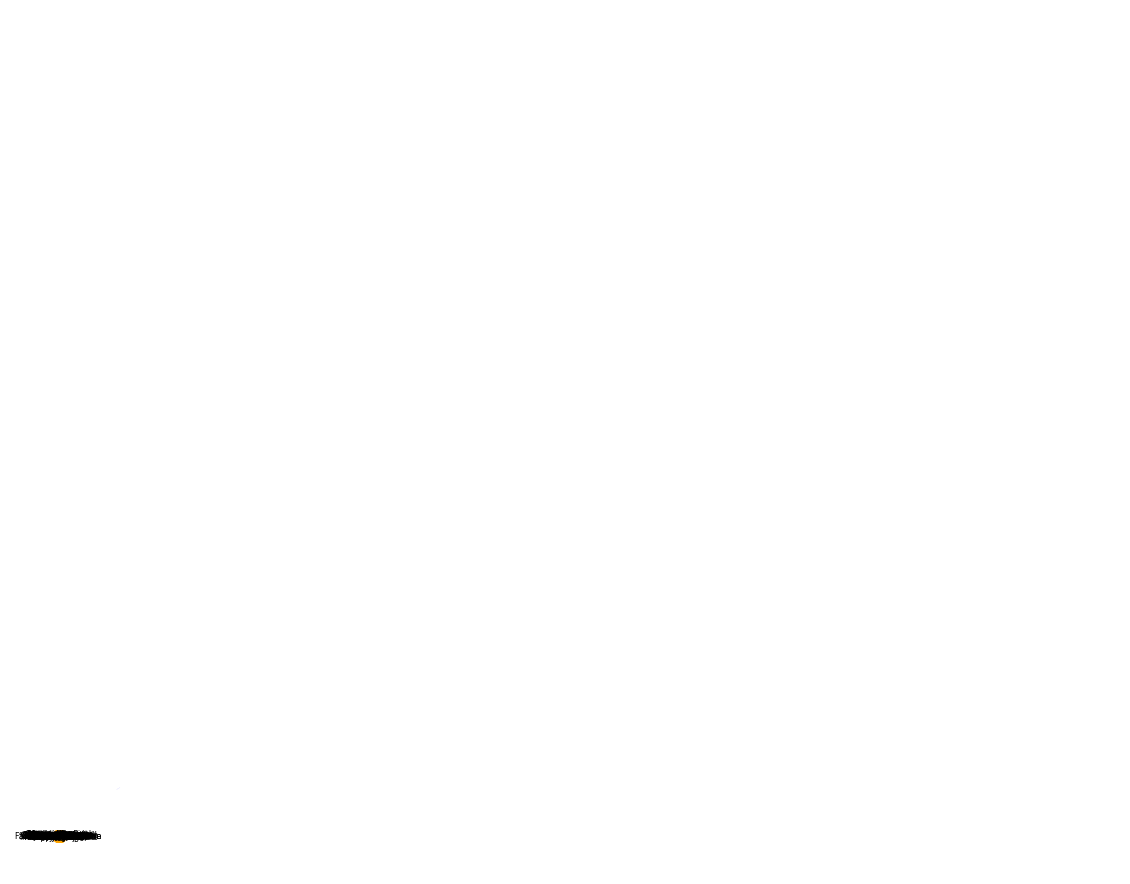

In [22]:
## Setup the Graph
# nodes
figure(figsize=(20, 16))
nx.draw_networkx_nodes(graph_box, pos, 
                       node_size=100,
                       node_color='orange')


nx.draw_networkx_edges(graph_box, pos, 
                       edgelist=elarge,
                       width=4,
                       edge_color='blue')

#nx.draw_networkx_edges(graph_box, pos, 
                       #edgelist=emedium,
                       #width=3,
                       #edge_color='green')

#nx.draw_networkx_edges(graph_box, pos, 
                       #edgelist=esmall,
                       #width=2, 
                       #edge_color='gray')

#labels

nx.draw_networkx_labels(graph_box, 
                        pos, 
                        font_size=8, 
                        font_family='Consolas')


plt.axis('off')
plt.show();

>**Analyzing the Network**

In [123]:
#Function to sort a dictionary by value
def sort_dict(dict):
    sorted_dict= sorted(dict.items(), key=lambda x: x[1],reverse=True)
    
    for key,value in sorted_dict:
        print(key, " = ", value)


#find number of nodes they are connected with
print("\nNodes Gonzalez, Johnston is connected with :\n-------------------------------")
print(nx.degree(graph_box,'Gonzalez, Johnston'))

#clustering - how close a team they form
print("\nClustering Co-efficient:\n----------------------")
sort_dict(nx.clustering(graph_box,weight='weight'))

#Find centrality of nodes
print("\nCentrality :\n---------------")
sort_dict(nx.degree_centrality(graph_box))

print("\nBetweenness:\n--------------")
sort_dict(nx.betweenness_centrality(graph_box))


Nodes Gonzalez, Johnston is connected with :
-------------------------------
4

Clustering Co-efficient:
----------------------
Baeza, Florencio  =  0
Castillo, Ernesto  =  0
Araya, Manuel  =  0
Bolli, Carlos  =  0
Pérez, Amador  =  0
Valdes, Mario  =  0
Ortiz, Rafael  =  0
Gallardo, Pedro  =  0
Iñiguez, Mario  =  0
Silva, Carlos  =  0
Farrafino, Clementina  =  0
Flores, Sara  =  0
Giaverini, Oscar  =  0
Huerta, Francisco  =  0
Inostroza, Ruperto  =  0
Tapia, Julio  =  0
Alley, Juan  =  0
Salinas, Juan  =  0
Olguín, Humberto  =  0
Valdenegro  =  0
Henriquez  =  0
Leiva  =  0
Acosta, Luis J.  =  0
Molina, Erasmo  =  0
Parra, Routier  =  0
Arratia, Jose  =  0
Rios, Agustin  =  0
Anguita, Oscar  =  0
Caldera, Francisco  =  0
Guerrero, Angel  =  0
Lasseube, Enrique  =  0
Gonzalez, Johnston  =  0
Suarez, Pablo  =  0
Correa, Luis  =  0
Cipry, John  =  0
Saavedra, Clemente  =  0
Jaña, Andres  =  0
Villablanca, Luis  =  0
Meza, Fernando  =  0
García, Francisco  =  0
Valdivieso, Raul  =  0
Gue

In [125]:
# Add the degree centrality score of each node to their metadata dictionary
dcs = nx.degree_centrality(graph_box)
for n in graph_box.nodes():
    graph_box.nodes[n]['centrality'] = dcs[n]

In [126]:
graph_box.nodes(data=True)

NodeDataView({'Baeza, Florencio': {'centrality': 0.016666666666666666}, 'Castillo, Ernesto': {'centrality': 0.016666666666666666}, 'Araya, Manuel': {'centrality': 0.03333333333333333}, 'Bolli, Carlos': {'centrality': 0.016666666666666666}, 'Pérez, Amador': {'centrality': 0.016666666666666666}, 'Valdes, Mario': {'centrality': 0.03333333333333333}, 'Ortiz, Rafael': {'centrality': 0.016666666666666666}, 'Gallardo, Pedro': {'centrality': 0.016666666666666666}, 'Iñiguez, Mario': {'centrality': 0.016666666666666666}, 'Silva, Carlos': {'centrality': 0.016666666666666666}, 'Farrafino, Clementina': {'centrality': 0.016666666666666666}, 'Flores, Sara': {'centrality': 0.016666666666666666}, 'Giaverini, Oscar': {'centrality': 0.03333333333333333}, 'Huerta, Francisco': {'centrality': 0.016666666666666666}, 'Inostroza, Ruperto': {'centrality': 0.016666666666666666}, 'Tapia, Julio': {'centrality': 0.016666666666666666}, 'Alley, Juan': {'centrality': 0.016666666666666666}, 'Salinas, Juan': {'centralit

In [127]:
graph_box.nodes()

NodeView(('Baeza, Florencio', 'Castillo, Ernesto', 'Araya, Manuel', 'Bolli, Carlos', 'Pérez, Amador', 'Valdes, Mario', 'Ortiz, Rafael', 'Gallardo, Pedro', 'Iñiguez, Mario', 'Silva, Carlos', 'Farrafino, Clementina', 'Flores, Sara', 'Giaverini, Oscar', 'Huerta, Francisco', 'Inostroza, Ruperto', 'Tapia, Julio', 'Alley, Juan', 'Salinas, Juan', 'Olguín, Humberto', 'Valdenegro', 'Henriquez', 'Leiva', 'Acosta, Luis J.', 'Molina, Erasmo', 'Parra, Routier', 'Arratia, Jose', 'Rios, Agustin', 'Anguita, Oscar', 'Caldera, Francisco', 'Guerrero, Angel', 'Lasseube, Enrique', 'Gonzalez, Johnston', 'Suarez, Pablo', 'Correa, Luis', 'Cipry, John', 'Saavedra, Clemente', 'Jaña, Andres', 'Villablanca, Luis', 'Meza, Fernando', 'García, Francisco', 'Valdivieso, Raul', 'Guerra, Oscar', 'Martinez, Alejandro', 'Araya, Jorge', 'Mery, Oscar', 'Ibarra, Daniel', 'Tapia, Manuel', 'Fajardo, Ruperto', 'Iglesias, Alvaro', 'Rojas, Nicanor', 'Vargas, Armando', 'Amparán, Miguel', 'Mendez, Arturo', 'Barros, Rogelio', 'Trias

In [129]:
#put nodes into a list
boxer_nodes = [n for n, d in graph_box.nodes(data=True)]

In [130]:
print(boxer_nodes)

['Baeza, Florencio', 'Castillo, Ernesto', 'Araya, Manuel', 'Bolli, Carlos', 'Pérez, Amador', 'Valdes, Mario', 'Ortiz, Rafael', 'Gallardo, Pedro', 'Iñiguez, Mario', 'Silva, Carlos', 'Farrafino, Clementina', 'Flores, Sara', 'Giaverini, Oscar', 'Huerta, Francisco', 'Inostroza, Ruperto', 'Tapia, Julio', 'Alley, Juan', 'Salinas, Juan', 'Olguín, Humberto', 'Valdenegro', 'Henriquez', 'Leiva', 'Acosta, Luis J.', 'Molina, Erasmo', 'Parra, Routier', 'Arratia, Jose', 'Rios, Agustin', 'Anguita, Oscar', 'Caldera, Francisco', 'Guerrero, Angel', 'Lasseube, Enrique', 'Gonzalez, Johnston', 'Suarez, Pablo', 'Correa, Luis', 'Cipry, John', 'Saavedra, Clemente', 'Jaña, Andres', 'Villablanca, Luis', 'Meza, Fernando', 'García, Francisco', 'Valdivieso, Raul', 'Guerra, Oscar', 'Martinez, Alejandro', 'Araya, Jorge', 'Mery, Oscar', 'Ibarra, Daniel', 'Tapia, Manuel', 'Fajardo, Ruperto', 'Iglesias, Alvaro', 'Rojas, Nicanor', 'Vargas, Armando', 'Amparán, Miguel', 'Mendez, Arturo', 'Barros, Rogelio', 'Trias, Alfonso

In [134]:
from networkx.algorithms import bipartite
G = bipartite.projected_graph(graph_box, boxer_nodes, multigraph=False)

NameError: name 'projected_graph' is not defined

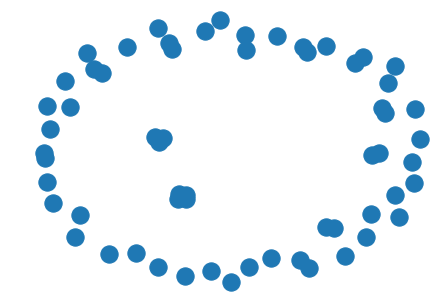

In [135]:
nx.draw(G)